In [299]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    if val_end < val_start:
        val_end = val_start + d[val_start:].find(")")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    #port = None
    
    for d in data:
        if "data_kind" in d:
            #d = d.replace("\n", "")
            #d = d.replace(" ", "")
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            nq = int(extract_val(d, "num_queries"))
            #wk = extract_val(d, "workload")
            if "port" not in d:
                break
            port = int(extract_val(d, "port"))
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-5])
            qerr = float(linedata[-3].replace("QErr:", ""))
            
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
            retdata["num_queries"].append(nq)
            #retdata["workload"].append(wk)
            retdata["port"].append(port)
            retdata["qerr"].append(qerr)
            
    df = pd.DataFrame(retdata)
    return df

In [278]:
#LOGDIR = "../results_sosd_good1/"
LOGDIR = "../results_sosd/"

In [279]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [280]:
df = pd.concat(dfs)

In [281]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'random_domain_sort_1M', 'true_cols', 'gen_sort_1M'} {'osm', 'wiki', 'fb', 'lognormal', 'books'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,port,qerr
0,0,0.001972,0,random_domain_sort_1M,fb,10000,5432,88.0
1,1,0.000927,0,random_domain_sort_1M,fb,10000,5432,91.0
2,2,0.000926,0,random_domain_sort_1M,fb,10000,5432,98.0
3,3,0.000616,0,random_domain_sort_1M,fb,10000,5432,112.0
4,4,0.000926,0,random_domain_sort_1M,fb,10000,5432,100.0
...,...,...,...,...,...,...,...,...
14995,9987,0.000275,2,true_cols,wiki,10000,5432,6.0
14996,9990,0.000262,2,true_cols,wiki,10000,5432,2.0
14997,9992,0.000268,2,true_cols,wiki,10000,5432,4.0
14998,9993,0.000276,2,true_cols,wiki,10000,5432,2.0


In [282]:
df.head(20)

,ehash,rt,rep,data_kind,inp_to_eval,num_queries,port,qerr
0,0,0.001972,0,random_domain_sort_1M,fb,10000,5432,88.0
1,1,0.000927,0,random_domain_sort_1M,fb,10000,5432,91.0
2,2,0.000926,0,random_domain_sort_1M,fb,10000,5432,98.0
3,3,0.000616,0,random_domain_sort_1M,fb,10000,5432,112.0
4,4,0.000926,0,random_domain_sort_1M,fb,10000,5432,100.0
5,5,0.000667,0,random_domain_sort_1M,fb,10000,5432,82.0
6,6,0.002840,0,random_domain_sort_1M,fb,10000,5432,99.0
7,7,0.000564,0,random_domain_sort_1M,fb,10000,5432,78.0
8,8,0.000747,0,random_domain_sort_1M,fb,10000,5432,85.0
9,9,0.001222,0,random_domain_sort_1M,fb,10000,5432,96.0


In [283]:
#df = df[df.inp_to_eval == 'books']
df = df[df.num_queries == 10000]
df = df[df.port == 5432]

In [284]:
df.keys()

Index(['ehash', 'rt', 'rep', 'data_kind', 'inp_to_eval', 'num_queries', 'port',
       'qerr'],
      dtype='object')

In [285]:
print(set(df["data_kind"]))
df.head(5)

{'random_domain_sort_1M', 'true_cols', 'gen_sort_1M'}


,ehash,rt,rep,data_kind,inp_to_eval,num_queries,port,qerr
0,0,0.001972,0,random_domain_sort_1M,fb,10000,5432,88.0
1,1,0.000927,0,random_domain_sort_1M,fb,10000,5432,91.0
2,2,0.000926,0,random_domain_sort_1M,fb,10000,5432,98.0
3,3,0.000616,0,random_domain_sort_1M,fb,10000,5432,112.0
4,4,0.000926,0,random_domain_sort_1M,fb,10000,5432,100.0


In [286]:
print(set(df["num_queries"]))

{10000}


In [287]:
mapping = {}
mapping["true_cols"] = "True Data"
mapping["gen_sort_1M"] = "Our Gen Data"
mapping["random_domain_sort_1M"] = "Uniform Domain Data"
#mapping["gen_shuffle"] = "Our Gen Data 2"
df["data_kind"] = df.apply(lambda x: mapping[x["data_kind"]] , axis=1)

In [288]:
df.groupby(["data_kind"])["qerr"].mean()

data_kind
Our Gen Data             1.413872
True Data                1.242823
Uniform Domain Data    100.514380
Name: qerr, dtype: float64

In [289]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
Our Gen Data           21.282073
True Data              22.872738
Uniform Domain Data    64.220841
Name: rt, dtype: float64

In [290]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
Our Gen Data,74958.0,0.000284,0.000057,0.000122,0.000295,0.000340,0.000407,0.000674
True Data,74931.0,0.000305,0.000047,0.000101,0.000302,0.000366,0.000414,0.001021
Uniform Domain Data,150000.0,0.000428,0.000121,0.000147,0.000412,0.000542,0.000839,0.003452


In [327]:
from scipy import stats

def show_scatter(df, xlabel):
    fig,axs = plt.subplots(nrows=2,ncols=3, figsize=(24,16))
    
    for i, inp in enumerate(list(set(df["inp_to_eval"]))):
        row = int(i / 3)
        col = int(i % 3)
        ax = axs[row][col]
        tmp = df[df.inp_to_eval == inp]
        tmp = tmp[tmp.data_kind.isin([xlabel, "True Data"])]

        tmp = tmp.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()
        edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()
        corr_val = round(edf.corr().values[0][1], 2)

        ## filtering outliers
        #edf = edf[(np.abs(stats.zscore(edf["Our Gen Data"])) < 3)]
        #edf = edf[(np.abs(stats.zscore(edf["True Data"])) < 3)]

        sns.scatterplot(data=edf, x = xlabel, y="True Data", alpha=0.2, ax=ax)

        title = inp + ", correlation: {}".format(corr_val)
        ax.set_title(title, fontsize=20)
        ax.set_ylabel("Latency (True Data)", fontsize=20)
        ax.set_xlabel("Latency ({})".format(xlabel), fontsize=20)

        #ax.locator_params(nbins=10)
        ax.ticklabel_format(axis="both", style="sci", scilimits=(0,0))
    
    plt.savefig("./sosd-{}.png".format(xlabel.replace(" ", "")))
    plt.show()

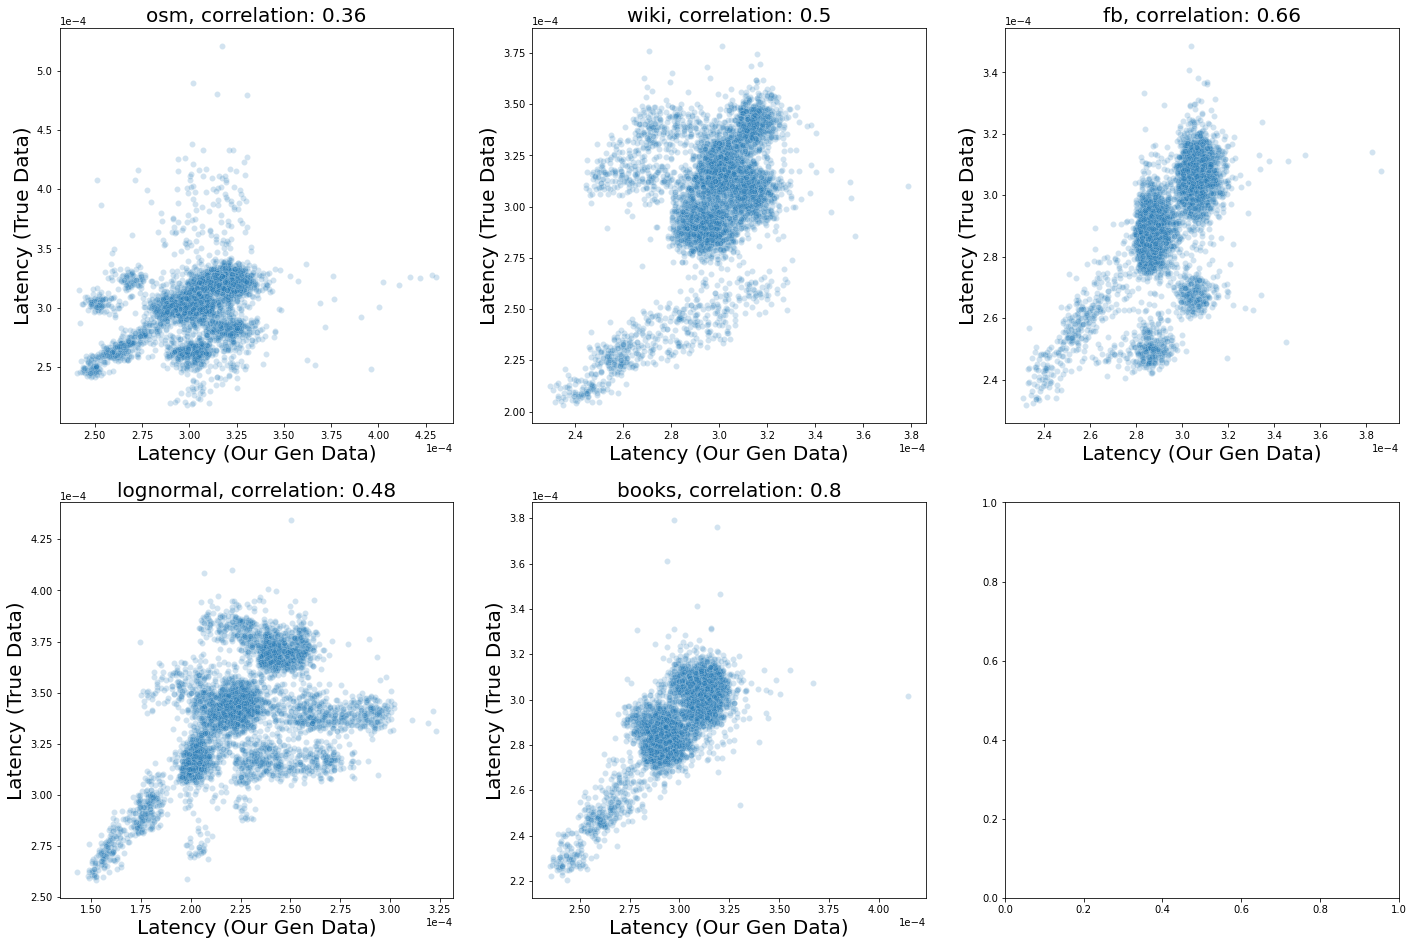

In [328]:
show_scatter(df, "Our Gen Data")

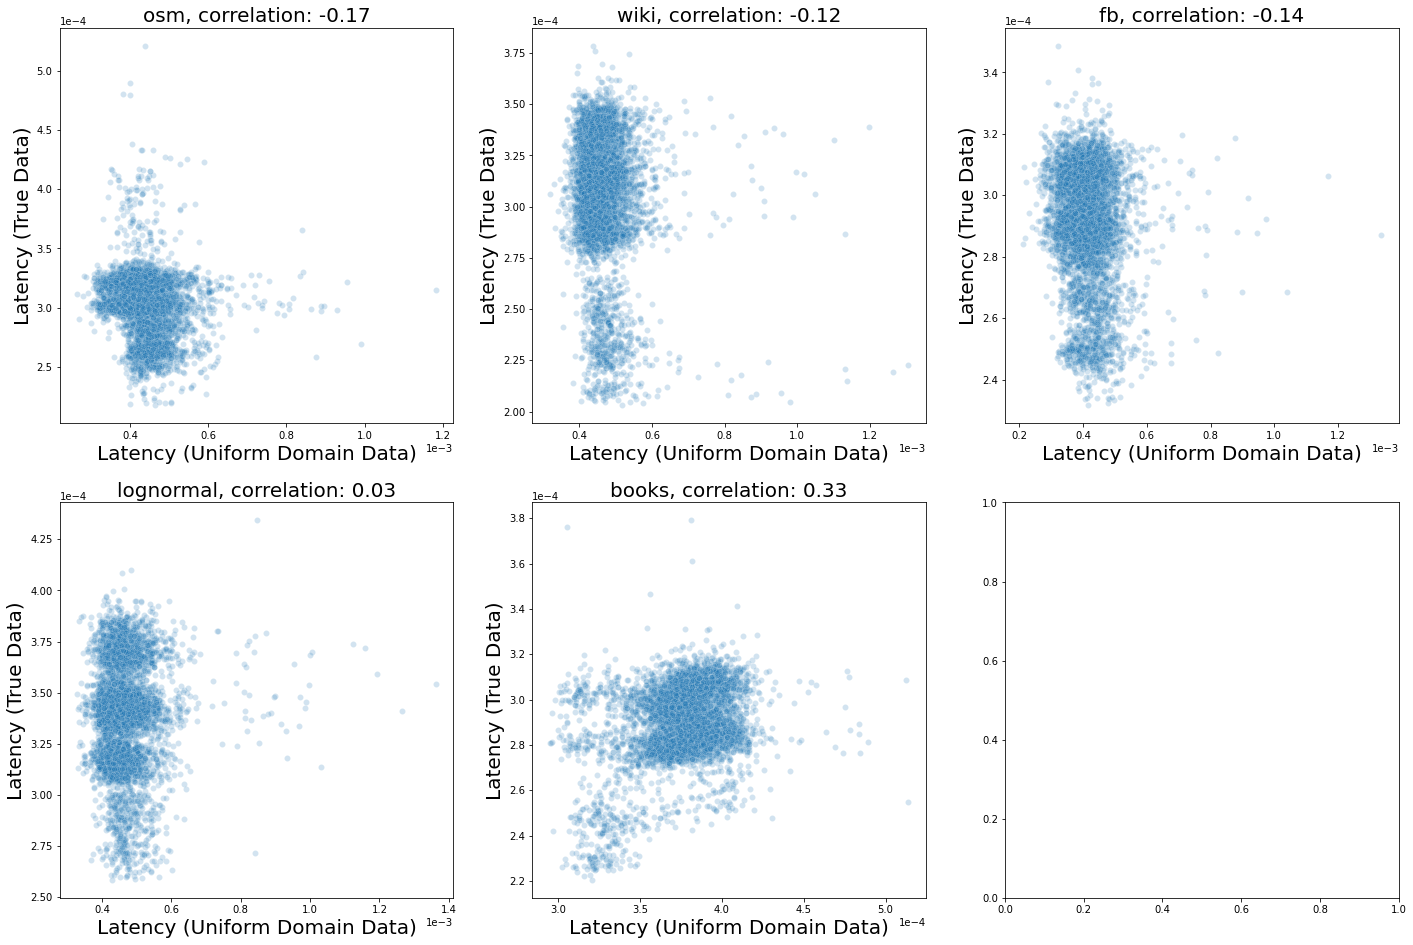

In [329]:
show_scatter(df, "Uniform Domain Data")